In [1]:
import json
import argparse
import numpy as np
import os
# import matplotlib.pyplot as plt
from shapely.geometry import Polygon
# from descartes.patch import PolygonPatch
from read_dd import read_data
import mask_to_poly as mr
import warnings
from PIL import Image


In [16]:
def display_results(rms_type, poly, doors, walls, out):
    print("Room Types:", rms_type)
    print("Polygon:", poly)
    print("Doors:", doors)
    print("Walls:", walls)
    print("Output:", out)

sample_image_path = "image/291.png"

try:
    rms_type, poly, doors, walls, out = read_data(sample_image_path)
    display_results(rms_type, poly, doors, walls, out)
except AssertionError as e:
    print(e)

Room Types: [3, 1, 3, 4, 5, 2, 17, 17, 17, 17, 17, 15]
Polygon: [4, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4]
Doors: [[130.0, 110.0, 130.0, 122.0], [130.0, 122.0, 132.0, 122.0], [132.0, 122.0, 132.0, 110.0], [132.0, 110.0, 130.0, 110.0], [130.0, 131.0, 130.0, 141.0], [130.0, 141.0, 132.0, 141.0], [132.0, 141.0, 132.0, 131.0], [132.0, 131.0, 130.0, 131.0], [135.0, 160.0, 135.0, 162.0], [135.0, 162.0, 147.0, 162.0], [147.0, 162.0, 147.0, 160.0], [147.0, 160.0, 135.0, 160.0], [59.0, 131.0, 59.0, 149.0], [59.0, 149.0, 61.0, 149.0], [61.0, 149.0, 61.0, 131.0], [61.0, 131.0, 59.0, 131.0], [186.0, 115.0, 186.0, 117.0], [186.0, 117.0, 206.0, 117.0], [206.0, 117.0, 206.0, 115.0], [206.0, 115.0, 186.0, 115.0], [152.0, 160.0, 152.0, 162.0], [152.0, 162.0, 166.0, 162.0], [166.0, 162.0, 166.0, 160.0], [166.0, 160.0, 152.0, 160.0]]
Walls: [[62.0, 82.0, 62.0, 124.0, -1, 3, 0, -1, 0], [62.0, 124.0, 129.0, 124.0, -1, 3, 0, -1, 0], [129.0, 124.0, 129.0, 82.0, -1, 3, 0, -1, 0], [129.0, 82.0, 62.0, 82.0, -1, 3, 0,

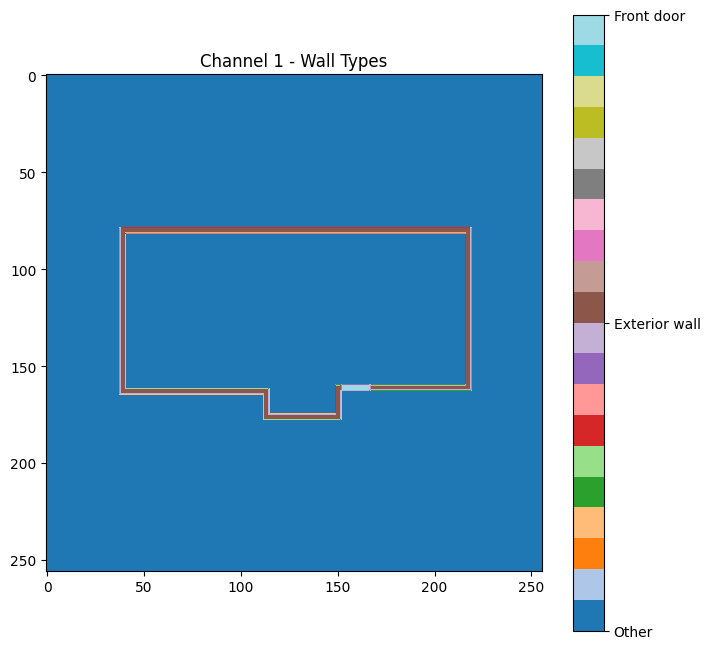

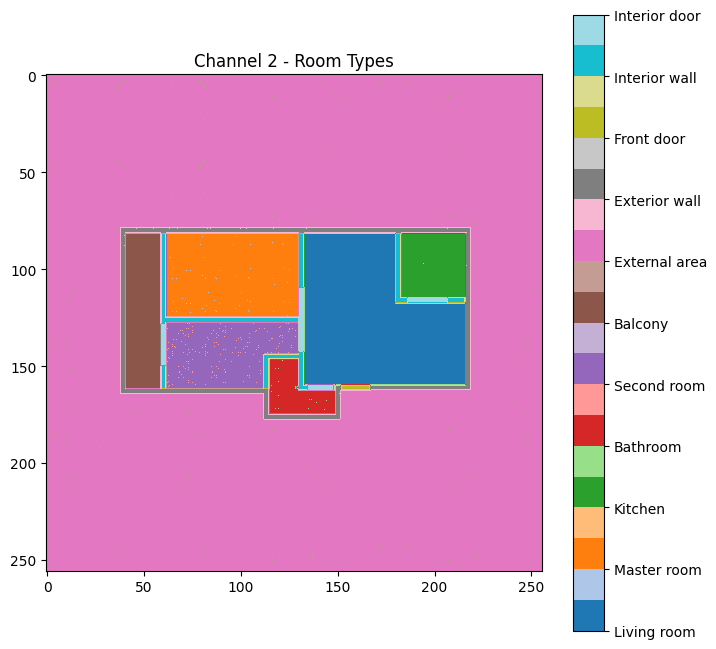

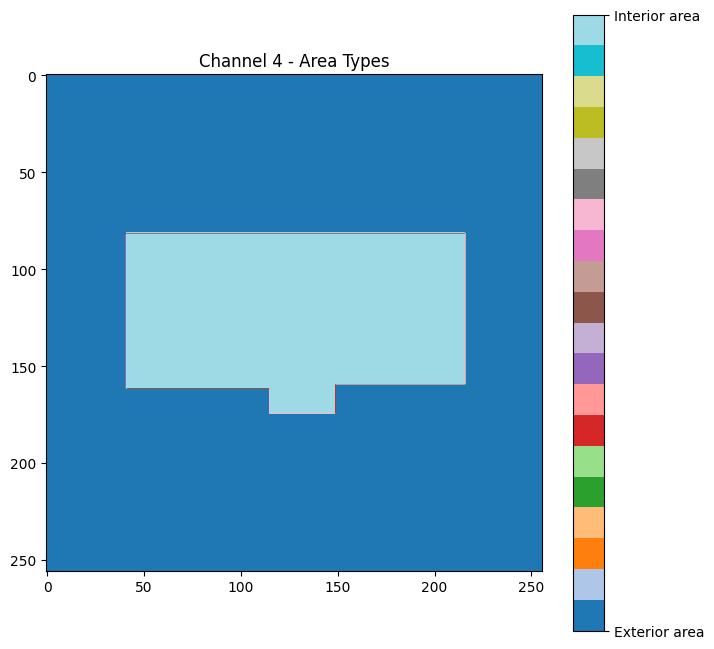

In [38]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "image/291.png"  # Replace with your image path
img = np.array(Image.open(image_path))

# Split channels
channel_1 = img[:, :, 0]
channel_2 = img[:, :, 1]
channel_3 = img[:, :, 2]
channel_4 = img[:, :, 3] if img.shape[2] > 3 else None

# Define mappings based on Excel sheet
channel_1_mapping = {
    127: "Exterior wall",
    255: "Front door",
    0: "Other"
}

channel_2_mapping = {
    0: "Living room",
    1: "Master room",
    2: "Kitchen",
    3: "Bathroom",
    4: "Dining room",
    5: "Child room",
    6: "Study room",
    7: "Second room",
    8: "Guest room",
    9: "Balcony",
    10: "Entrance",
    11: "Storage",
    12: "Wall-in",
    13: "External area",
    14: "Exterior wall",
    15: "Front door",
    16: "Interior wall",
    17: "Interior door"
}

channel_4_mapping = {
    0: "Exterior area",
    255: "Interior area"
}

# Create a function to visualize the mappings
def visualize_channel(channel, mapping, title):
    unique_values = np.unique(channel)
    color_map = {val: idx for idx, val in enumerate(unique_values)}
    colored_channel = np.vectorize(color_map.get)(channel)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(colored_channel, cmap='tab20')
    cbar = plt.colorbar(ticks=range(len(unique_values)))
    cbar.ax.set_yticklabels([mapping[val] for val in unique_values])
    plt.title(title)
    plt.show()

# Visualize the channels
visualize_channel(channel_1, channel_1_mapping, "Channel 1 - Wall Types")
visualize_channel(channel_2, channel_2_mapping, "Channel 2 - Room Types")
if channel_4 is not None:
    visualize_channel(channel_4, channel_4_mapping, "Channel 4 - Area Types")


Room Types: [3, 1, 3, 4, 5, 2, 17, 17, 17, 17, 17, 15]
Polygon: [4, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4]
Doors: [[130.0, 110.0, 130.0, 122.0], [130.0, 122.0, 132.0, 122.0], [132.0, 122.0, 132.0, 110.0], [132.0, 110.0, 130.0, 110.0], [130.0, 131.0, 130.0, 141.0], [130.0, 141.0, 132.0, 141.0], [132.0, 141.0, 132.0, 131.0], [132.0, 131.0, 130.0, 131.0], [135.0, 160.0, 135.0, 162.0], [135.0, 162.0, 147.0, 162.0], [147.0, 162.0, 147.0, 160.0], [147.0, 160.0, 135.0, 160.0], [59.0, 131.0, 59.0, 149.0], [59.0, 149.0, 61.0, 149.0], [61.0, 149.0, 61.0, 131.0], [61.0, 131.0, 59.0, 131.0], [186.0, 115.0, 186.0, 117.0], [186.0, 117.0, 206.0, 117.0], [206.0, 117.0, 206.0, 115.0], [206.0, 115.0, 186.0, 115.0], [152.0, 160.0, 152.0, 162.0], [152.0, 162.0, 166.0, 162.0], [166.0, 162.0, 166.0, 160.0], [166.0, 160.0, 152.0, 160.0]]
Walls: [[62.0, 82.0, 62.0, 124.0, -1, 3, 0, -1, 0], [62.0, 124.0, 129.0, 124.0, -1, 3, 0, -1, 0], [129.0, 124.0, 129.0, 82.0, -1, 3, 0, -1, 0], [129.0, 82.0, 62.0, 82.0, -1, 3, 0,

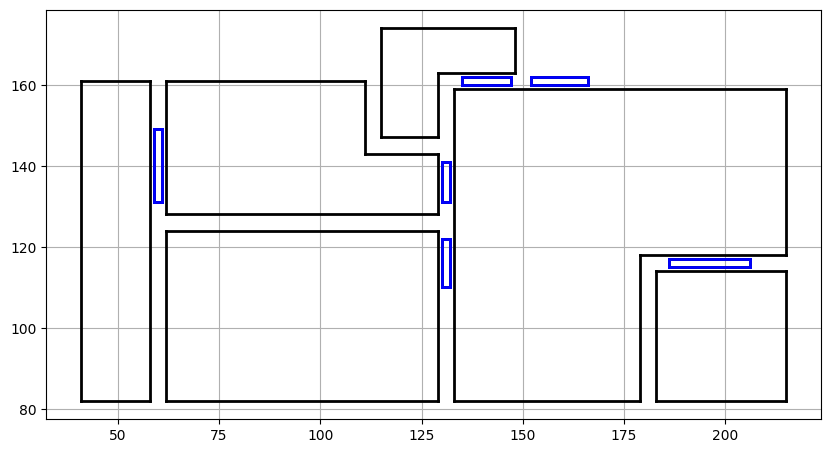

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def plot_layout(room_types, poly, doors, walls):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Define colors for different room types
    room_colors = {
        1: '#EE4D4D', 2: '#C67C7B', 3: '#FFD274', 4: '#BEBEBE', 5: '#BFE3E8',
        6: '#7BA779', 7: '#E87A90', 8: '#FF8C69', 9: '#1F849B', 10: '#727171',
        11: '#785A67', 12: '#D3A2C7', 13: '#FFA500', 14: '#5A5A5A', 15: '#AAAAAA',
        16: '#4B4B4B', 17: '#D3D3D3'
    }

    # Plot rooms
    for i, room in enumerate(poly):
        if isinstance(room, list) and len(room) >= 3:  # Ensure there are at least 3 points to form a polygon
            room_color = room_colors.get(room_types[i], '#000000')
            ax.add_patch(plt.Polygon(room, closed=True, fill=True, color=room_color, alpha=0.5))
            # Annotate room number
            room_center = np.mean(room, axis=0)
            ax.text(room_center[0], room_center[1], str(room_types[i]), horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

    # Plot walls
    for wall in walls:
        x1, y1, x2, y2 = wall[:4]
        ax.plot([x1, x2], [y1, y2], 'k-', linewidth=2)

    # Plot doors
    for door in doors:
        x1, y1, x2, y2 = door[:4]
        ax.plot([x1, x2], [y1, y2], 'b-', linewidth=2)

    ax.set_aspect('equal')
    plt.grid(True)
    plt.show()

def display_results(rms_type, poly, doors, walls, out):
    print("Room Types:", rms_type)
    print("Polygon:", poly)
    print("Doors:", doors)
    print("Walls:", walls)
    print("Output:", out)
    plot_layout(rms_type, poly, doors, walls)

sample_image_path = "image/291.png"

try:
    rms_type, poly, doors, walls, out = read_data(sample_image_path)
    display_results(rms_type, poly, doors, walls, out)
except AssertionError as e:
    print(e)
except ValueError as e:
    print(e)
except TypeError as e:
    print(e)


In [31]:
line = 'image/291.png'
poly=[]
img = np.asarray(Image.open(line))
print(np.zeros((256, 256)))
# # Save the array with space as delimiter
# with open('image_data.txt', 'w') as f:
#     # Loop through each element and write to the file
#     for row in img:
#         for value in row:
#             f.write(str(value) + ' ')  
#         f.write('\n')  

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
line = 'image/291.png'
poly=[]
img = np.asarray(Image.open(line))
dec=0
img_room_type=img[:,:,1]
img_room_number=img[:,:,2]
wall_img=np.zeros((256, 256))
for k in range(256):
    for h in range(256):
        if(img_room_type[k][h]==16):
            wall_img[k][h]=16		
        if(img_room_type[k][h]==17):
            wall_img[k][h]=10
room_no=img_room_number.max()
room_imgs=[]
rm_types=[]
for i in range(room_no):
    room_img=np.zeros((256, 256))
    for k in range(256):
        for h in range(256):
            if(img_room_number[k][h]==i+1):
                room_img[k][h]=1
                k_=k
                h_=h
    rm_t=img_room_type[k_][h_]

    #changing rplan rooms_type to housegan++ rooms_type
    if(rm_t==0):
        rm_types.append(1)		
    elif(rm_t==1):
        rm_types.append(3)
    elif(rm_t==2):
        rm_types.append(2)		
    elif(rm_t==3):
        rm_types.append(4)
    elif(rm_t==4):
        rm_types.append(7)
    elif(rm_t==5):
        rm_types.append(3)
    elif(rm_t==6):
        rm_types.append(8)
    elif(rm_t==7):
        rm_types.append(3)
    elif(rm_t==8):
        rm_types.append(3)
    elif(rm_t==9):
        rm_types.append(5)
    elif(rm_t==10):
        rm_types.append(6)
    elif(rm_t==11):
        rm_types.append(10)
    else:
        rm_types.append(16)
    room_imgs.append(room_img)

walls=[]
doors=[]
rm_type=rm_types
######################################
for t in range(len(room_imgs)):
    tmp=room_imgs[t]
    for k in range(254):
        for h in range(254):
            if(tmp[k][h]==1) & (tmp[k+1][h]==0) & (tmp[k+2][h]==1):
                tmp[k+1][h] =1				
    for k in range(254):
        for h in range(254):
            if(tmp[h][k]==1) & (tmp[h][k+1]==0) & (tmp[h][k+2]==1):
                tmp[h][k+1] =1				
    for k in range(254):
        for h in range(254):
            if(tmp[k][h]==0) & (tmp[k+1][h]==1) & (tmp[k+2][h]==0):
                tmp[k+1][h] =0				
    for k in range(254):
        for h in range(254):
            if(tmp[h][k]==0) & (tmp[h][k+1]==1) & (tmp[h][k+2]==0):
                tmp[h][k+1] =0

    room_imgs[t]=tmp
    poly2=mr.get_polygon(room_imgs[t])
    coords_1=list(poly2.exterior.coords)
    coords=[]
    for kn in range(len(coords_1)):
        coords.append([list(coords_1[kn])[1],list(coords_1[kn])[0],0,0,t,rm_type[t]]) 
    p=0
    for c in range(len(coords)-1):
        walls.append([coords[c][0],coords[c][1],coords[c+1][0],coords[c+1][1],-1,coords[c][5],coords[c][4],-1,0])
    p=len(coords)-1
    poly.append(p)		
tmp=img[:,:,1]


door_img=np.zeros((256, 256))
doors_img=[]		
for k in range(256):
    for h in range(256):
        if(tmp[k][h]==17):
            door_img[k][h]=1

tmp=door_img
rms_type=rm_type

######################################

coords=[]
for k in range(2,254):
    for h in range(2,254):
        if(tmp[k][h]==1):
            if((tmp[k-1][h]==0) & (tmp[k-1][h-1]==0)&(tmp[k][h-1]==0)):
                coords.append([h,k,0,0])
            elif (tmp[k+1][h]==0)&(tmp[k+1][h-1]==0)&(tmp[k][h-1]==0):
                coords.append([h,k,0,0])
            elif (tmp[k+1][h]==0)&(tmp[k+1][h+1]==0)&(tmp[k][h+1]==0): 
                coords.append([h,k,0,0])
            elif (tmp[k-1][h]==0)&(tmp[k-1][h+1]==0)&(tmp[k][h+1]==0): 
                coords.append([h,k,0,0])					
            elif(tmp[k+1][h]==1)&(tmp[k][h+1]==1)& (tmp[k+1][h+1]==0):
                coords.append([h,k,0,0])					
            elif(tmp[k-1][h]==1)&(tmp[k][h+1]==1)& (tmp[k-1][h+1]==0):
                coords.append([h,k,0,0])					
            elif(tmp[k+1][h]==1)&(tmp[k][h-1]==1)&(tmp[k+1][h-1]==0) : 
                coords.append([h,k,0,0])				
            elif(tmp[k-1][h]==1) & (tmp[k][h-1]==1) & (tmp[k-1][h-1]==0):
                coords.append([h,k,0,0])
                
tmp_diff=1000000   
p_x_1=coords[0][0]
for k in range(1, len(coords)):
    p_x_2=coords[k][0]
    tmp_dif=abs(p_x_1-p_x_2)
    if(tmp_dif<tmp_diff)&(tmp_dif>1):
        tmp_diff=tmp_dif
p_y_1=coords[0][1]
for k in range(1, len(coords)):
    p_y_2=coords[k][1]
    tmp_dif=abs(p_y_1-p_y_2)
    if(tmp_dif<tmp_diff)&(tmp_dif>1):
        tmp_diff=tmp_dif

door_imgs=read_door(door_img,img,tmp_diff)
door_no=int(door_imgs.max())
door_tp=[]
for i in range(door_no):
    door_img=np.zeros((256, 256))
    for k in range(256):
        for h in range(256):
            if(door_imgs[k][h]==i+1):door_img[k][h]=1
    doors_img.append(door_img)
rmpn=len(doors_img)				
for t in range(len(doors_img)):
    tmp=doors_img[t]
    kpp=np.max(tmp)
    if(kpp<=0):
        dec=dec+1
        continue
    poly2=mr.get_polygon(doors_img[t])
    coords_1=list(poly2.exterior.coords)#
    coords=[]
    for kn in range(len(coords_1)):
        coords.append([list(coords_1[kn])[1],list(coords_1[kn])[0],0,0,t,17]) 
    p=0
    for c in range(len(coords)-1):
        walls.append([coords[c][0],coords[c][1],coords[c+1][0],coords[c+1][1],-1,17,len(rms_type)+coords[c][4]-dec,-1,0])
        doors.append([coords[c][0],coords[c][1],coords[c+1][0],coords[c+1][1]])
    p=len(coords)-1
    poly.append(p)
tmp=img[:,:,1]
en_img=np.zeros((256, 256))
for k in range(256):
    for h in range(256):
        if(tmp[k][h]==15):
            en_img[k][h]=1
tmp=en_img
coords=[]
for k in range(2,254):
    for h in range(2,254):
        if(tmp[k][h]==1):
            if((tmp[k-1][h]==0) & (tmp[k-1][h-1]==0)&(tmp[k][h-1]==0)):
                coords.append([h,k,0,0])
            elif (tmp[k+1][h]==0)&(tmp[k+1][h-1]==0)&(tmp[k][h-1]==0):
                coords.append([h,k,0,0])
            elif (tmp[k+1][h]==0)&(tmp[k+1][h+1]==0)&(tmp[k][h+1]==0): 
                coords.append([h,k,0,0])
            elif (tmp[k-1][h]==0)&(tmp[k-1][h+1]==0)&(tmp[k][h+1]==0): 
                coords.append([h,k,0,0])
            elif(tmp[k+1][h]==1)&(tmp[k][h+1]==1)& (tmp[k+1][h+1]==0):
                coords.append([h,k,0,0])					
            elif(tmp[k-1][h]==1)&(tmp[k][h+1]==1)& (tmp[k-1][h+1]==0):
                coords.append([h,k,0,0])					
            elif(tmp[k+1][h]==1)&(tmp[k][h-1]==1)&(tmp[k+1][h-1]==0) : 
                coords.append([h,k,0,0])					
            elif(tmp[k-1][h]==1) & (tmp[k][h-1]==1) & (tmp[k-1][h-1]==0):
                coords.append([h,k,0,0])
                
en_imgs=[]
for i in range(1):

    door_img=np.zeros((256, 256))
    for k in range(256):
        for h in range(256):
            if(en_img[k][h]==i+1):
                en_img[k][h]=1
    en_imgs.append(en_img)
for t in range(len(en_imgs)):
    tmp=en_imgs[t]
    kpp=np.max(tmp)
    if(kpp<=0):
        dec=dec+1
        continue
    poly2=mr.get_polygon(en_imgs[t])
    coords_1=list(poly2.exterior.coords)
    coords=[]
    for kn in range(len(coords_1)):
        coords.append([list(coords_1[kn])[1],list(coords_1[kn])[0],0,0,t,15]) 
    p=0
    for c in range(len(coords)-1):
        walls.append([coords[c][0],coords[c][1],coords[c+1][0],coords[c+1][1],-1,15,rmpn+len(rms_type)+coords[c][4]-dec,-1,0])
        doors.append([coords[c][0],coords[c][1],coords[c+1][0],coords[c+1][1]])
    p=len(coords)-1
    poly.append(p)

no_doors=int(len(doors)/4)
rms_type=rm_type
for i in range(no_doors-1):
    rms_type.append(17)
rms_type.append(15)
out=1
print(print("Rooms Type: ", rms_type))

Rooms Type:  [3, 1, 3, 4, 5, 2, 17, 17, 17, 17, 17, 15]
None


In [7]:
def read_door(door_img,img,tmp_diff):
	tmp3=door_img.copy()
	tmp4=door_img.copy()
	for k in range(256):
		for h in range(256):
			has=[]
			for knm in range(10):
				has.append(0)
			if(tmp4[k][h]==1):
				p=img[k-tmp_diff-4:k+tmp_diff+4,h-tmp_diff-4:h+tmp_diff+4,2]
				s=p[np.nonzero(p)]
				if(len(s)==0):
					continue
				r=[]
				kmmmm=s[0]
				for t in range(len(s)):
					if(t==0):
						r.append(s[t])
					elif(s[t] not in r):
						r.append(s[t])
				if(len(r)>=3):
					 tmp3[k][h]=0	
				elif(len(r)==2):
					has[r[0]]=1
					has[r[1]]=1
					tmp3[k][h]= has[0]*1+has[1]*2+has[3]*4+has[4]*8+has[5]*16+has[6]*32+has[7]*64+has[8]*128+has[9]*256
	s=np.unique(tmp3)
	tmp4=tmp3.copy()
	for ks in range(len(s)):
		for k in range(256):
			for h in range(256):
				if(tmp3[k][h]==s[ks]):
					tmp4[k][h]=int(ks)
	return tmp4